In [18]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

__author__ = 'Vatsal'
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exploring training and test data

In [19]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Have a quick look at the data
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [20]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [21]:
train.shape

(137, 43)

In [22]:
test.shape

(100000, 42)

In [23]:
Y = train.revenue # This is our target feature
Y.head()

0    5653753.0
1    6923131.0
2    2055379.0
3    2675511.0
4    4316715.0
Name: revenue, dtype: float64

In [24]:
test_id = test.Id #Id column in data is of no use
train = train.drop(['Id', 'revenue'], axis=1)
test = test.drop(['Id'], axis=1 )

In [25]:
train.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,2.0,3.0,5,3,4,5,5,4,3,4
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,3.0,0,0,0,0,0,0,0,0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,1.0,3.0,0,0,0,0,0,0,0,0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,2.5,7.5,25,12,10,6,18,12,12,6
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,1.0,3.0,5,1,3,2,3,4,3,3


In [26]:
test.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,2.0,3.0,0,4,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,5.0,3.0,0,0,0,0,0,0,0,0


## Columns which have most the values as 0s

In [28]:
train.describe()
# can remove all column with more than 75 percentile zeros.

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,3.222628,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,2.308806,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,2.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,12.500000,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000


## Some columns in Test-set have values that are not in Training-set 

## 'City' - column 

In [33]:
test_r = test.copy(deep=True)
train_r = train.copy(deep=True)
print test['City'].head()
print '\n'
print test['City'].unique()  #print a set uniques City values in test
print '\n'
print train['City'].unique()  #print a set uniques City values in train

0             Niğde
1             Konya
2            Ankara
3           Kocaeli
4    Afyonkarahisar
Name: City, dtype: object


['Ni\xc4\x9fde' 'Konya' 'Ankara' 'Kocaeli' 'Afyonkarahisar'
 'Eski\xc5\x9fehir' 'Rize' '\xc4\xb0stanbul' 'Trabzon' 'Antalya'
 'Mu\xc4\x9fla' 'D\xc3\xbczce' 'Adana' 'Bursa' 'Ayd\xc4\xb1n' 'Hatay'
 'Denizli' '\xc4\xb0zmir' 'Gaziantep' 'Samsun' 'Erzurum' 'Edirne'
 'Bal\xc4\xb1kesir' 'Mersin' 'Zonguldak' 'Malatya' '\xc3\x87anakkale'
 'Kars' 'Bolu' 'Batman' 'Bilecik' 'Giresun' 'Tekirda\xc4\x9f' 'Sivas'
 'K\xc4\xb1r\xc4\xb1kkale' 'Mardin' 'Erzincan' 'Manisa' 'Diyarbak\xc4\xb1r'
 'Kahramanmara\xc5\x9f' 'Yalova' 'Tan\xc4\xb1ms\xc4\xb1z' 'Sakarya'
 'K\xc4\xb1r\xc5\x9fehir' 'Aksaray' 'Kayseri' 'Nev\xc5\x9fehir'
 '\xc3\x87orum' 'Ordu' 'K\xc4\xb1rklareli' '\xc5\x9eanl\xc4\xb1urfa'
 'Artvin' 'U\xc5\x9fak' 'K\xc3\xbctahya' 'Siirt'
 '\xc3\x87ank\xc4\xb1r\xc4\xb1' 'Isparta']


['\xc4\xb0stanbul' 'Ankara' 'Diyarbak\xc4\xb1r' 'Tokat' 'Gaziantep'
 'Afyonkarahisar' 'Edirne' 'Koca

In [34]:
print test["City"].unique().shape # size of uniques values in test for City Column
print train["City"].unique().shape # size of uniques values in test for City Column

(57,)
(34,)


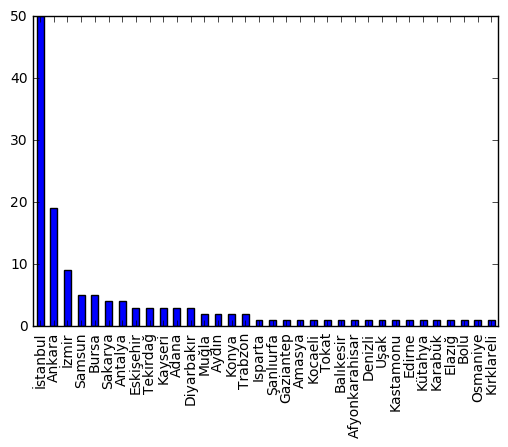

In [38]:
# Plot Train
train_r["City"].value_counts().plot(kind='bar')
plt.show()

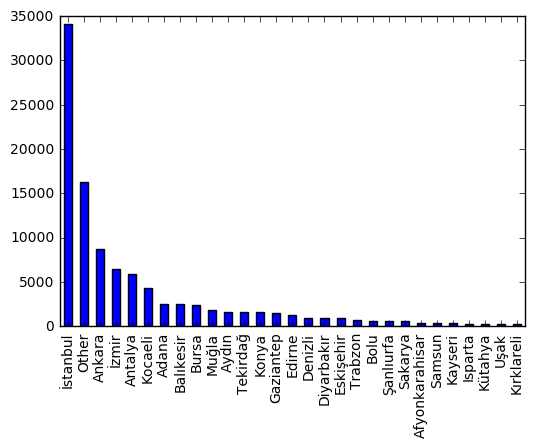

In [39]:
# How many more values are in Test data ?
city_train_arr = train["City"].unique()
test_r["City"] = test_r["City"].map(lambda x: 'Other' if x not in city_train_arr else x)

# Plot for Test
test_r["City"].value_counts().plot(kind='bar')
plt.show()

##  'Type' column:

(4,)
['FC' 'IL' 'DT' 'Other']


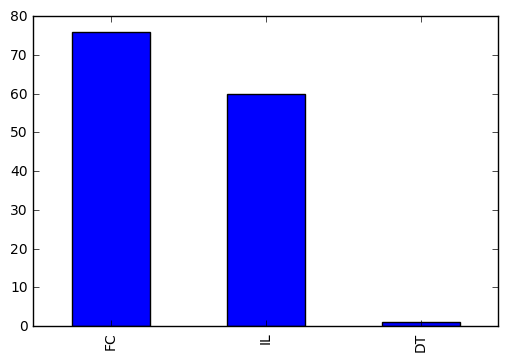

FC    76
IL    60
DT     1
Name: Type, dtype: int64


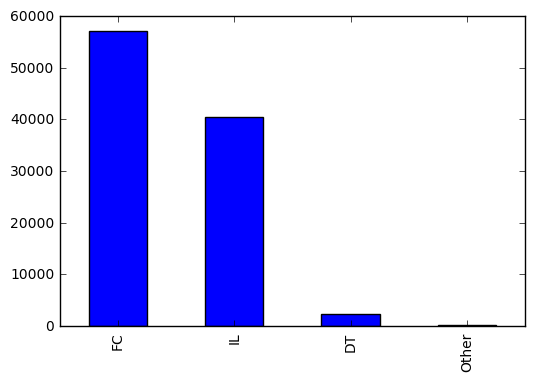

FC       57019
IL       40447
DT        2244
Other      290
Name: Type, dtype: int64


In [41]:
test_r = test.copy(deep=True)
train_r = train.copy(deep=True)
type_train_arr = train_r["Type"].unique()
test_r["Type"] = test_r["Type"].map(lambda x: 'Other' if x not in type_train_arr else x)
print test_r["Type"].unique().shape
print(test_r["Type"].unique())
train_r["Type"].value_counts().plot(kind='bar')
plt.show()
print train_r["Type"].value_counts()
test_r["Type"].value_counts().plot(kind='bar')
plt.show()
print test_r["Type"].value_counts()

## Hence all the extra values in the Test set must be replaced used knn-imputation